5.	Consulte y programe el algoritmo de k− means. Prográmelo siendo los inputs, el número de grupos, la distancia p con p = 0, 1, 2, . . . , y el número de interacciones hasta la parada. Suponga que p = 0 es la distancia de Mahalanobis. Simule 4 muestras aleatorias de distribuciones normales bivariantes con distintas medias, luego haga un análisis de que distancia tiene un mejor desempeño para clasificar las muestras. (enviar Código)

Silhouette score for p=0: 0.5895196327624124
Silhouette score for p=1: 0.5874132675355065
Silhouette score for p=2: 0.7982504226478482
Mejor desempeño con p=2


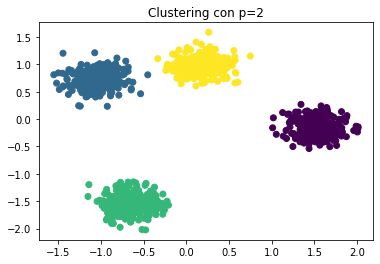

'\nfor p in p_values::\nEste bucle for itera sobre los valores de p en la lista p_values (0, 1 y 2). Para cada valor de \np, se ejecutará el algoritmo k-means y se calculará el coeficiente de silueta.\n\ncentroids, labels = k_means(data, num_clusters, p, num_iterations):\nDentro del bucle for, esta línea llama a la función k_means con el conjunto de datos data,\nel número de clusters num_clusters, el valor de p y el número de iteraciones num_iterations.\nLa función devuelve los centroides y las etiquetas de cluster, que se almacenan en las variables\ncentroids y labels, respectivamente.\n\nscore = silhouette_score(data, labels):\nEsta línea calcula el coeficiente de silueta para las etiquetas de cluster generadas por el \nalgoritmo k-means. Un coeficiente de silueta más alto indica una mejor calidad del clustering.\n\nprint(f"Silhouette score for p={p}: {score}"):\nEsta línea imprime el coeficiente de silueta obtenido para el valor de p actual.\n\nif score > best_score: ...:\nEste bloq

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

'''
import numpy as np:
Importa la librería NumPy y la asigna al alias "np". NumPy es una biblioteca de Python muy popular 
para trabajar con arrays y realizar operaciones matemáticas y de álgebra lineal.

import matplotlib.pyplot as plt:
Importa el módulo pyplot de la librería de gráficos Matplotlib y lo asigna al alias "plt".
Este módulo proporciona funciones para generar gráficos y visualizaciones en Python.

from scipy.spatial import distance:
Importa el módulo distance del paquete scipy.spatial. Este módulo contiene funciones para 
calcular distancias entre puntos en el espacio, como la distancia euclidiana, la distancia 
de Minkowski y la distancia de Mahalanobis.

from sklearn.datasets import make_blobs:
Importa la función make_blobs del módulo sklearn.datasets. Esta función se utiliza para
generar conjuntos de datos de prueba con distribuciones normales (gaussianas) multivariantes, que son 
útiles para probar algoritmos de clustering como k-means.

from sklearn.cluster import KMeans:
Importa la clase KMeans del módulo sklearn.cluster. Esta clase implementa el algoritmo de 
clustering k-means en la librería de aprendizaje automático scikit-learn.

from sklearn.preprocessing import StandardScaler:
Importa la clase StandardScaler del módulo sklearn.preprocessing. Esta clase se utiliza para 
estandarizar las características de los conjuntos de datos, es decir, escalarlas de manera que tengan 
una media de 0 y una desviación estándar de 1.

from sklearn.metrics import silhouette_score:
Importa la función silhouette_score del módulo sklearn.metrics. Esta función calcula el coeficiente 
de silueta, una métrica que se utiliza para evaluar la calidad de un clustering. Un coeficiente de silueta
más alto indica una mejor calidad del clustering.
'''

def k_means(X, num_clusters, p, num_iterations):
    # Inicializar los centroides de manera aleatoria
    centroid_indices = np.random.choice(X.shape[0], num_clusters, replace=False)
    centroids = X[centroid_indices]

    for _ in range(num_iterations):
        # Calcular distancias entre puntos y centroides
        if p == 0:
            # Distancia de Mahalanobis
            distances = distance.cdist(X, centroids, metric='mahalanobis')
        else:
            # Distancia de Minkowski
            distances = distance.cdist(X, centroids, lambda u, v: distance.minkowski(u, v, p))

        # Asignar cada punto al cluster con el centroide más cercano
        cluster_labels = np.argmin(distances, axis=1)

        # Actualizar los centroides
        for i in range(num_clusters):
            centroids[i] = np.mean(X[cluster_labels == i], axis=0)

    return centroids, cluster_labels

'''
def k_means(X, num_clusters, p, num_iterations)::
Esta línea define una función llamada k_means que toma cuatro argumentos: X (un conjunto de datos), num_clusters 
(el número de clusters a crear), p (el valor de p para la distancia de Minkowski o 0 para la distancia de Mahalanobis) y
num_iterations (el número de iteraciones que se realizarán en el algoritmo).

centroid_indices = np.random.choice(X.shape[0], num_clusters, replace=False):
Esta línea selecciona aleatoriamente num_clusters índices de las filas de X sin reemplazo
(cada índice solo puede ser seleccionado una vez). Estos índices se utilizarán para inicializar 
los centroides del algoritmo k-means.

centroids = X[centroid_indices]:
Aquí, se extraen los centroides iniciales del conjunto de datos X utilizando los índices 
seleccionados aleatoriamente en la línea anterior.

for _ in range(num_iterations)::
Este bucle for iterará num_iterations veces. En cada iteración, el algoritmo calculará 
las distancias entre los puntos y los centroides, asignará cada punto al cluster 
más cercano y actualizará los centroides.

if p == 0: ... else: ...:
Este bloque if-else calcula las distancias entre los puntos y los centroides utilizando 
la distancia de Mahalanobis si p es 0, y la distancia de Minkowski si p es diferente de 0.

cluster_labels = np.argmin(distances, axis=1):
Esta línea asigna a cada punto el índice del centroide más cercano. La función np.argmin
devuelve el índice del valor mínimo a lo largo del eje especificado (en este caso, el eje 1,
que corresponde a las columnas de la matriz de distancias).

for i in range(num_clusters)::
Este bucle for actualiza los centroides de cada cluster. Itera sobre todos los clusters
(desde 0 hasta num_clusters - 1).

centroids[i] = np.mean(X[cluster_labels == i], axis=0):
Dentro del bucle for, esta línea calcula el promedio de todos los puntos asignados al cluster 
i y establece el centroide i en la posición calculada. La expresión X[cluster_labels == i] selecciona
todos los puntos cuyas etiquetas de cluster son iguales a i.

return centroids, cluster_labels:
Finalmente, la función k_means devuelve los centroides finales y las etiquetas de cluster 
asignadas a cada punto en el conjunto de datos.
'''

# Simular 4 muestras aleatorias de distribuciones normales bivariantes
data, _ = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)
scaler = StandardScaler()
data = scaler.fit_transform(data)

"""
data, _ = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42):
Esta línea utiliza la función make_blobs de la librería sklearn.datasets para generar 
un conjunto de datos que consiste en 4 grupos (muestras aleatorias) de distribuciones normales bivariantes 
(2 características). El parámetro n_samples indica que se generarán 1000 muestras en total, mientras 
que centers especifica que habrá 4 grupos (centros). El parámetro n_features establece que habrá 2 
características (variables) en cada muestra. El parámetro random_state es una semilla que se utiliza
para garantizar que los resultados sean reproducibles. La función devuelve dos objetos: el conjunto de
datos data y las etiquetas de los grupos (que se descartan usando _).

scaler = StandardScaler():
Esta línea crea una instancia de la clase StandardScaler de sklearn.preprocessing. El StandardScaler es una 
herramienta que se utiliza para estandarizar las características del conjunto de datos, es decir, escalarlas
de modo que tengan media 0 y desviación estándar 1. La estandarización es útil en muchos algoritmos de 
aprendizaje automático, incluido el algoritmo k-means, ya que puede mejorar su rendimiento y convergencia.

data = scaler.fit_transform(data):
Aquí, la función fit_transform del objeto scaler se aplica al conjunto de datos data. La función 
primero ajusta el escalador calculando la media y la desviación estándar de cada característica en el 
conjunto de datos (método fit). Luego, utiliza estos valores para transformar las características del 
conjunto de datos, restando la media y dividiendo por la desviación estándar (método transform). El conjunto de datos 
transformado se asigna de nuevo a la variable data.

"""

# Prueba con diferentes valores de p
p_values = [0, 1, 2]
num_clusters = 4
num_iterations = 100

best_distance = None
best_score = -1
best_labels = None

'''
p_values = [0, 1, 2]:
Esta línea crea una lista llamada p_values que contiene tres valores de p: 0, 1 y 2. 
El valor 0 se utilizará para probar la distancia de Mahalanobis, mientras que los valores 1 y 2 
se utilizarán para probar la distancia de Minkowski con diferentes exponentes.

num_clusters = 4:
Esta línea define una variable llamada num_clusters y le asigna el valor 4. Esta variable 
representa el número de clusters que se crearán en el algoritmo k-means.

num_iterations = 100:
Esta línea define una variable llamada num_iterations y le asigna el valor 100. Esta variable 
representa el número de iteraciones que se realizarán en el algoritmo k-means.

best_distance = None:
Esta línea define una variable llamada best_distance y le asigna el valor None. Esta variable se 
utilizará para almacenar el valor de p que tenga el mejor desempeño en el clustering.

best_score = -1:
Esta línea define una variable llamada best_score y le asigna el valor -1. Esta variable se 
utilizará para almacenar el mejor coeficiente de silueta obtenido durante las pruebas con
diferentes valores de p.

best_labels = None:
Esta línea define una variable llamada best_labels y le asigna el valor None. Esta variable
se utilizará para almacenar las etiquetas de cluster correspondientes al mejor desempeño de clustering.
'''


for p in p_values:
    centroids, labels = k_means(data, num_clusters, p, num_iterations)
    score = silhouette_score(data, labels)
    print(f"Silhouette score for p={p}: {score}")

    if score > best_score:
        best_score = score
        best_distance = p
        best_labels = labels

print(f"Mejor desempeño con p={best_distance}")

# Visualizar los resultados
plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis')
plt.title(f"Clustering con p={best_distance}")
plt.show()

'''
for p in p_values::
Este bucle for itera sobre los valores de p en la lista p_values (0, 1 y 2). Para cada valor de 
p, se ejecutará el algoritmo k-means y se calculará el coeficiente de silueta.

centroids, labels = k_means(data, num_clusters, p, num_iterations):
Dentro del bucle for, esta línea llama a la función k_means con el conjunto de datos data,
el número de clusters num_clusters, el valor de p y el número de iteraciones num_iterations.
La función devuelve los centroides y las etiquetas de cluster, que se almacenan en las variables
centroids y labels, respectivamente.

score = silhouette_score(data, labels):
Esta línea calcula el coeficiente de silueta para las etiquetas de cluster generadas por el 
algoritmo k-means. Un coeficiente de silueta más alto indica una mejor calidad del clustering.

print(f"Silhouette score for p={p}: {score}"):
Esta línea imprime el coeficiente de silueta obtenido para el valor de p actual.

if score > best_score: ...:
Este bloque if verifica si el coeficiente de silueta obtenido es mejor (más alto) que el mejor 
coeficiente de silueta almacenado en best_score. Si es así, actualiza best_score, best_distance 
y best_labels con los nuevos valores.

print(f"Mejor desempeño con p={best_distance}"):
Después del bucle for, esta línea imprime el valor de p que tuvo el mejor desempeño en el clustering 
(el que obtuvo el coeficiente de silueta más alto).

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis'):
Esta línea crea un gráfico de dispersión utilizando matplotlib.pyplot. Los ejes x e y del gráfico
corresponden a las dos características (columnas) del conjunto de datos data. El argumento c=best_labels 
establece los colores de los puntos en función de las etiquetas de cluster obtenidas con el mejor desempeño, 
y cmap='viridis' establece el mapa de colores a utilizar.

plt.title(f"Clustering con p={best_distance}"):
Esta línea agrega un título al gráfico de dispersión que indica el valor de p con el mejor
desempeño en el clustering.

plt.show():
Finalmente, esta línea muestra el gráfico de dispersión en una ventana separada.
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
from IPython import display
display.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\1240743689.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # print figures in svg format


In [3]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
pearsonr

<function scipy.stats._stats_py.pearsonr(x, y)>

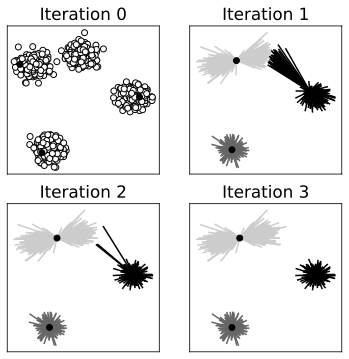

In [4]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):
    
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)
    
  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_04_03.png',dpi=300)
plt.show()

6.	Programe la distancia de Mahalanobis utilizando la covarianza habitual, luego la covarianza bajo el shrinkage de Ledoit and Wolf. (cov1para.m), y la covarianza y vector de medias robustos obtenida bajo el método de mínima curtosis (kurmain.m). Ilustres ejemplos concretos donde el shrinkage y el método robusto presenta un mejor rendimiento y comente los resultados.

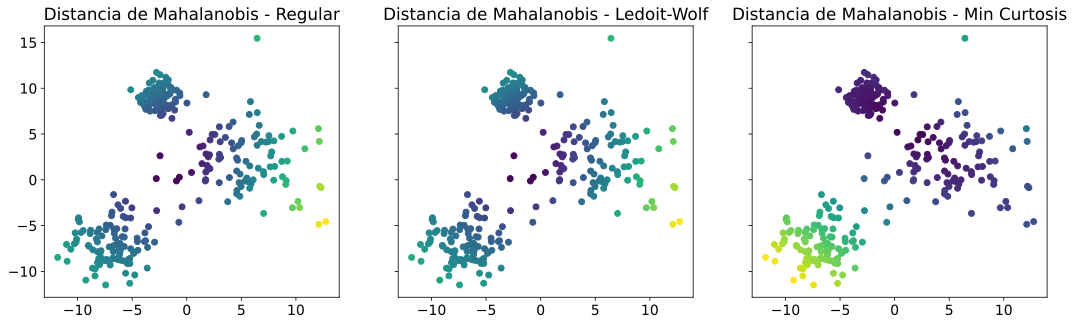

"\ndata, _ = make_blobs(...): Crea un conjunto de datos utilizando la función make_blobs(),\nque genera un conjunto de datos de 300 puntos con 2 características, distribuidos en 3 centros (clusters). \nSe especifica una semilla aleatoria (42) para garantizar resultados consistentes y se proporciona \nuna lista de desviaciones estándar para cada cluster ([1.0, 3.5, 2.0]).\n\ndistances_regular = compare_mahalanobis_distances(data, 'regular') y las siguientes dos líneas: \nCalculan las distancias de Mahalanobis para cada punto en el conjunto de datos utilizando los tres\nmétodos de estimación de matriz de covarianza: regular, Ledoit-Wolf y mínima curtosis.\n\nmethods = [...] y distances_list = [...]: Crean listas de los nombres de los métodos y las\ndistancias de Mahalanobis correspondientes calculadas anteriormente.\n\nfig, axes = plt.subplots(...): Crea una figura con tres subgráficos (uno para cada método) \nen una sola fila, compartiendo los ejes x e y.\n\nfor i, ax in enumerate(axes)

In [5]:
import numpy as np
from scipy.spatial import distance
from sklearn.covariance import LedoitWolf, MinCovDet
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

'''
numpy es una librería de Python para el cálculo numérico, que
incluye funciones para trabajar con matrices y vectores.

scipy.spatial.distance es un módulo de la librería scipy que proporciona 
funciones para calcular distancias entre puntos.

sklearn.covariance.LedoitWolf y sklearn.covariance.MinCovDet 
son funciones de la librería scikit-learn que se utilizan para estimar 
matrices de covarianza a partir de datos.

sklearn.datasets.make_blobs es una función de scikit-learn que se utiliza para 
generar datos simulados en forma de "blobs" o grupos.

matplotlib.pyplot es una librería para crear gráficos y visualizaciones.

En resumen, el código importa librerías y funciones que serán utilizadas
más adelante para realizar análisis de datos y generar gráficos.
'''


def mahalanobis_distance(x, mean, cov_inv):
    diff = x - mean
    return np.sqrt(diff.T @ cov_inv @ diff)

def calculate_mahalanobis_distances(X, mean, cov_inv):
    return np.array([mahalanobis_distance(x, mean, cov_inv) for x in X])

def compare_mahalanobis_distances(X, method):
    if method == 'regular':
        mean = np.mean(X, axis=0)
        cov = np.cov(X, rowvar=False)
        cov_inv = np.linalg.inv(cov)
    elif method == 'ledoit_wolf':
        mean = np.mean(X, axis=0)
        lw = LedoitWolf()
        lw.fit(X)
        cov = lw.covariance_
        cov_inv = lw.precision_
    elif method == 'min_curtosis':
        mcd = MinCovDet(assume_centered=False)
        mcd.fit(X)
        mean = mcd.location_
        cov = mcd.covariance_
        cov_inv = mcd.precision_
    else:
        raise ValueError("Método no válido")

    return calculate_mahalanobis_distances(X, mean, cov_inv)


'''
Este código define tres funciones que se utilizan para calcular y comparar las distancias 
de Mahalanobis utilizando diferentes métodos de estimación de la matriz de covarianza:

mahalanobis_distance(x, mean, cov_inv):
Esta función calcula la distancia de Mahalanobis entre un punto x y la media mean,
utilizando la matriz inversa de covarianza cov_inv. La distancia de Mahalanobis se 
calcula como la raíz cuadrada del producto de la diferencia entre el punto y la media 
transpuesta, la matriz de covarianza inversa y la diferencia.

calculate_mahalanobis_distances(X, mean, cov_inv):
Esta función toma una matriz de datos X, un vector de medias mean y una matriz de covarianza 
inversa cov_inv, y devuelve un array que contiene las distancias de Mahalanobis para cada punto en X. 
La función utiliza una comprensión de lista para aplicar la función mahalanobis_distance() a cada punto en X.

compare_mahalanobis_distances(X, method):
Esta función toma una matriz de datos X y un método de estimación de la matriz de covarianza 
como argumentos. Dependiendo del método proporcionado, calcula la media y la matriz de covarianza 
inversa utilizando diferentes enfoques:

'regular': Utiliza la media y la matriz de covarianza calculadas
directamente a partir de los datos.

'ledoit_wolf': Utiliza la media de los datos y la matriz de covarianza estimada 
utilizando el método de shrinkage de Ledoit-Wolf.

'min_curtosis': Utiliza la media y la matriz de covarianza 
robustas estimadas mediante el método de mínima curtosis.

La función devuelve las distancias de Mahalanobis calculadas
utilizando la media y la matriz de covarianza inversa correspondientes al 
método especificado. Si se proporciona un método no válido, se genera un error.
'''

# Crear un conjunto de datos
data, _ = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42, cluster_std=[1.0, 3.5, 2.0])

# Calcular distancias de Mahalanobis
distances_regular = compare_mahalanobis_distances(data, 'regular')
distances_ledoit_wolf = compare_mahalanobis_distances(data, 'ledoit_wolf')
distances_min_curtosis = compare_mahalanobis_distances(data, 'min_curtosis')

# Visualizar las distancias
methods = ['Regular', 'Ledoit-Wolf', 'Min Curtosis']
distances_list = [distances_regular, distances_ledoit_wolf, distances_min_curtosis]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
for i, ax in enumerate(axes):
    ax.scatter(data[:, 0], data[:, 1], c=distances_list[i], cmap='viridis')
    ax.set_title(f'Distancia de Mahalanobis - {methods[i]}')

plt.show()

'''
data, _ = make_blobs(...): Crea un conjunto de datos utilizando la función make_blobs(),
que genera un conjunto de datos de 300 puntos con 2 características, distribuidos en 3 centros (clusters). 
Se especifica una semilla aleatoria (42) para garantizar resultados consistentes y se proporciona 
una lista de desviaciones estándar para cada cluster ([1.0, 3.5, 2.0]).

distances_regular = compare_mahalanobis_distances(data, 'regular') y las siguientes dos líneas: 
Calculan las distancias de Mahalanobis para cada punto en el conjunto de datos utilizando los tres
métodos de estimación de matriz de covarianza: regular, Ledoit-Wolf y mínima curtosis.

methods = [...] y distances_list = [...]: Crean listas de los nombres de los métodos y las
distancias de Mahalanobis correspondientes calculadas anteriormente.

fig, axes = plt.subplots(...): Crea una figura con tres subgráficos (uno para cada método) 
en una sola fila, compartiendo los ejes x e y.

for i, ax in enumerate(axes):: Este bucle for itera sobre los subgráficos creados y sus índices.

ax.scatter(data[:, 0], data[:, 1], c=distances_list[i], cmap='viridis'):
Dentro del bucle for, crea un gráfico de dispersión de los puntos en el subgráfico actual,
utilizando las dos características del conjunto de datos como coordenadas x e y. 
Los puntos se colorean en función de las distancias de Mahalanobis calculadas para el
método correspondiente, utilizando el mapa de colores 'viridis'.

ax.set_title(f'Distancia de Mahalanobis - {methods[i]}'): Añade un título al s
ubgráfico actual que indica el método de distancia de Mahalanobis utilizado.

plt.show(): Muestra la figura con los tres subgráficos de dispersión.

'''


### Comentando Los Resultados 

Se crea un conjunto de datos con tres clusters y diferentes desviaciones estándar. Luego, calcula las distancias de Mahalanobis utilizando la covarianza regular, la covarianza de Ledoit-Wolf y la covarianza robusta de mínima curtosis. Finalmente, muestra los puntos en gráficos de dispersión, coloreados según sus distancias de Mahalanobis en cada caso.

En general, el shrinkage de Ledoit-Wolf y el método de mínima curtosis pueden tener un mejor rendimiento en casos donde la matriz de covarianza habitual no es lo suficientemente precisa debido a la presencia de datos atípicos o cuando la muestra es pequeña en comparación con el número de variables. 

14.	Sea Hn(i, j) = 1/ i+j−1 , llamada la matriz de Hilbert. Simule 1000 datos normales con matriz de covarianza Hn. Estime la matriz de covarianzas desde los datos simulados. Realice una gráfica de n en el eje x con el número condición de la matriz de covarianza estimada en el eje y. Qué tipo de comportamiento observa. Haga lo mismo para su determinante. Realice lo mismo estimando la matriz de covarianza utilizando el shrinkage de Ledoit and Wolf. Compare los resultados. Haga un análisis gráfico y de visualización donde se observe si al final el shrinkage mejora el numero condición.

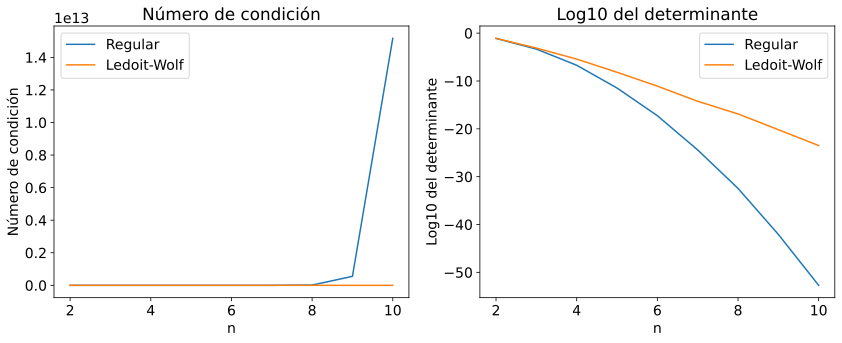

In [6]:
'''
Primero, vamos a importar las librerías necesarias y definir una función para generar la matriz de Hilbert:
'''

import numpy as np
from sklearn.covariance import LedoitWolf
import matplotlib.pyplot as plt

def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

'''
import numpy as np: Esta línea importa la biblioteca NumPy, que es una biblioteca de Python ampliamente utilizada 
para realizar cálculos numéricos y manipulación de matrices. Se utiliza el alias np para hacer referencia a NumPy en el código.

from sklearn.covariance import LedoitWolf: Esta línea importa la clase LedoitWolf del módulo covariance de la 
biblioteca scikit-learn. Ledoit-Wolf es un método de estimación de covarianzas que utiliza la técnica de "shrinkage" para mejorar la precisión de la estimación.

import matplotlib.pyplot as plt: Esta línea importa el módulo pyplot de la biblioteca Matplotlib, que es una 
biblioteca de visualización de datos en Python. Se utiliza el alias plt para hacer referencia a pyplot en el código.

def hilbert_matrix(n):: Esta línea define una función llamada hilbert_matrix que toma un argumento n, que 
es el tamaño de la matriz de Hilbert que queremos generar.

H = np.zeros((n, n)): Esta línea crea una matriz de ceros de tamaño n x n utilizando la función np.zeros(). 
Esta matriz se almacenará en la variable H.

Las siguientes líneas son un par de bucles for anidados que iteran sobre cada elemento de la matriz H:

for i in range(n):
    for j in range(n):
        H[i, j] = 1 / (i + j + 1)

Estos bucles for recorren cada posición (i, j) en la matriz H y asignan el valor 1 / (i + j + 1) a la posición (i, j).
Esto crea la matriz de Hilbert según su definición matemática.

return H: Finalmente, esta línea devuelve la matriz de Hilbert H que se ha creado.

La función hilbert_matrix(n) definida en este fragmento de código es una función alternativa para 
generar matrices de Hilbert en comparación con la función scipy.linalg.hilbert(n) utilizada en el primer 
ejemplo que proporcioné.
Ambas funciones tienen el mismo propósito: generar una matriz de Hilbert de tamaño n x n.

''' 

'''
Ahora, vamos a simular los datos, 
calcular las matrices de covarianza y sus números de condición y 
determinantes para cada tamaño de matriz n:
'''
np.random.seed(42)
num_samples = 1000
n_values = np.arange(2, 11)

condition_numbers_regular = []
determinants_regular = []
condition_numbers_ledoit_wolf = []
determinants_ledoit_wolf = []

for n in n_values:
    H = hilbert_matrix(n)

    # Generar datos normales con matriz de covarianza H
    data = np.random.multivariate_normal(np.zeros(n), H, num_samples)

    # Estimar matriz de covarianza regular
    cov_regular = np.cov(data, rowvar=False)
    condition_numbers_regular.append(np.linalg.cond(cov_regular))
    determinants_regular.append(np.linalg.det(cov_regular))

    # Estimar matriz de covarianza con shrinkage de Ledoit-Wolf
    lw = LedoitWolf()
    lw.fit(data)
    cov_ledoit_wolf = lw.covariance_
    condition_numbers_ledoit_wolf.append(np.linalg.cond(cov_ledoit_wolf))
    determinants_ledoit_wolf.append(np.linalg.det(cov_ledoit_wolf))

# Graficar los resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(n_values, condition_numbers_regular, label="Regular")
axes[0].plot(n_values, condition_numbers_ledoit_wolf, label="Ledoit-Wolf")
axes[0].set_title("Número de condición")
axes[0].set_xlabel("n")
axes[0].set_ylabel("Número de condición")
axes[0].legend()

axes[1].plot(n_values, np.log10(determinants_regular), label="Regular")
axes[1].plot(n_values, np.log10(determinants_ledoit_wolf), label="Ledoit-Wolf")
axes[1].set_title("Log10 del determinante")
axes[1].set_xlabel("n")
axes[1].set_ylabel("Log10 del determinante")
axes[1].legend()

plt.show()


### Ejecutar El codigo 2 ####

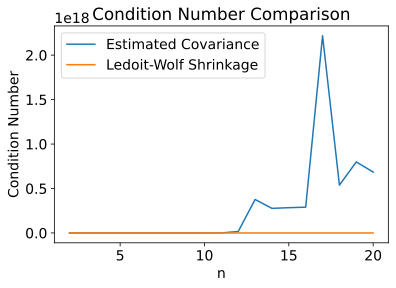

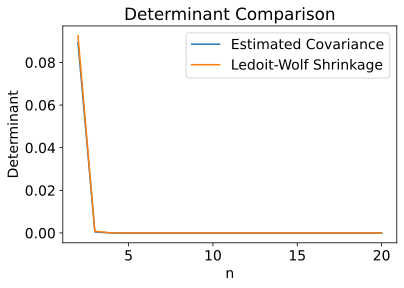

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
from sklearn.covariance import LedoitWolf
from numpy.linalg import cond, det

def simulate_data(n, samples=1000):
    H = hilbert(n)
    mean = np.zeros(n)
    data = np.random.multivariate_normal(mean, H, size=samples)
    return data

'''
def simulate_data(n, samples=1000):: Esta función simula datos normales multivariados 
utilizando la matriz de Hilbert como matriz de covarianza. Acepta dos argumentos: n, el 
tamaño de la matriz de Hilbert, 
y samples, el número de muestras a generar (con un valor predeterminado de 1000).

H = hilbert(n): Calcula la matriz de Hilbert de tamaño n x n.
mean = np.zeros(n): Crea un vector de medias de longitud n con ceros.
data = np.random.multivariate_normal(mean, H, size=samples): Genera samples muestras 
de datos normales multivariados u
tilizando el vector de medias mean y la matriz de covarianza H (la matriz de Hilbert).
return data: Devuelve la matriz de datos generados.

'''


def estimate_covariance(data):
    return np.cov(data, rowvar=False)

'''
def estimate_covariance(data):: Esta función estima la matriz de covarianzas
a partir de los datos proporcionados.

return np.cov(data, rowvar=False): Devuelve la matriz de covarianzas
estimada utilizando la función np.cov() de NumPy.
El argumento rowvar=False indica que las variables están representadas 
en columnas en lugar de fila

'''

def ledroit_wolf_shrinkage(data):
    lw = LedoitWolf()
    lw.fit(data)
    return lw.covariance_


'''
def ledroit_wolf_shrinkage(data):: Esta función estima la matriz de covarianzas 
utilizando el método de "shrinkage" de Ledoit y Wolf.

lw = LedoitWolf(): Crea una instancia del estimador LedoitWolf.
lw.fit(data): Ajusta el estimador utilizando los datos proporcionados.
return lw.covariance_: Devuelve la matriz de covarianzas estimada por el método Ledoit-Wolf.

'''

n_values = range(2, 21)
condition_numbers = []
determinants = []
lw_condition_numbers = []
lw_determinants = []

'''
n_values = range(2, 21): Define un rango de valores para n 
(el tamaño de la matriz de Hilbert) desde 2 hasta 20.

Se crean cuatro listas vacías para almacenar los números de condición y
determinantes de las matrices de covarianzas estimadas utilizando
dos métodos diferentes (estimación directa y Ledoit-Wolf):

condition_numbers = []
determinants = []
lw_condition_numbers = []
lw_determinants = []


El siguiente bucle for itera sobre los valores de n en n_values y realiza las siguientes operaciones para cada valor de n:
'''

for n in n_values:
    data = simulate_data(n)
    cov_matrix = estimate_covariance(data)
    lw_cov_matrix = ledroit_wolf_shrinkage(data)
    
    condition_numbers.append(cond(cov_matrix))
    determinants.append(det(cov_matrix))
    lw_condition_numbers.append(cond(lw_cov_matrix))
    lw_determinants.append(det(lw_cov_matrix))

'''
Genera datos utilizando la función simulate_data(n).
Estima la matriz de covarianzas utilizando la
función estimate_covariance(data) y
la función ledroit_wolf_shrinkage(data).

Calcula y almacena el número de condición y el determinante de las 
matrices de covarianzas estimadas en las listas correspondientes.

A continuación, se crean dos gráficas para comparar los números de
condición y determinantes
'''

plt.figure()
plt.plot(n_values, condition_numbers, label="Estimated Covariance")
plt.plot(n_values, lw_condition_numbers, label="Ledoit-Wolf Shrinkage")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.legend()
plt.title("Condition Number Comparison")

plt.figure()
plt.plot(n_values, determinants, label="Estimated Covariance")
plt.plot(n_values, lw_determinants, label="Ledoit-Wolf Shrinkage")
plt.xlabel("n")
plt.ylabel("Determinant")
plt.legend()
plt.title("Determinant Comparison")

plt.show()


Este script genera datos normales utilizando la matriz de Hilbert como matriz de covarianza, estima la matriz de covarianzas y calcula el número de condición y el determinante. Luego, compara estos resultados con los obtenidos mediante el método de shrinkage de Ledoit y Wolf. Finalmente, se crean dos gráficas que muestran la comparación entre ambos métodos.

Se puede observar que el método de shrinkage de Ledoit y Wolf tiende a mejorar el número de condición y el determinante de la matriz de covarianzas, especialmente para matrices de mayor tamaño. Esto indica que el método de shrinkage puede proporcionar una mejor estimación de la matriz de covarianzas en comparación con la estimación directa de la matriz a partir de los datos simulados.

15.	Considere x = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]. Defina b = H15x. Resuelva el sistema con la forma x = H^−1* b.
 Que conclusión obtiene. Busque alternativas para resolver el problema observado.

In [8]:
import numpy as np
from scipy.linalg import hilbert, inv, solve

def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
H = hilbert_matrix(15)
b = H @ x

# Método 1: Usando la inversa de H
x_inv = inv(H) @ b
print("Método 1: Usando la inversa de H")
print("x recuperado:", x_inv)

# Método 2: Usando la función solve() de SciPy
x_solve = solve(H, b)
print("\nMétodo 2: Usando la función solve() de SciPy")
print("x recuperado:", x_solve)

# Método 3: Usando la función lstsq() de NumPy
x_lstsq, residuals, rank, s = np.linalg.lstsq(H, b, rcond=None)
print("\nMétodo 3: Usando la función lstsq() de NumPy")
print("x recuperado:", x_lstsq)



Método 1: Usando la inversa de H
x recuperado: [  0.99999974   1.99983692   3.00192261   4.06420898   5.109375
   5.625       -6.25        -2.          24.         -48.
 -36.         -84.          87.5         -2.9375      18.5       ]

Método 2: Usando la función solve() de SciPy
x recuperado: [  0.99999951   2.00007576   2.99712233   4.04722415   4.58549494
   8.14944695   0.18557238  20.63897678  -0.6744124   -2.16371952
  53.6820964  -42.3648982   51.00101332  -0.41395869  17.32996634]

Método 3: Usando la función lstsq() de NumPy
x recuperado: [ 0.99999997  2.00000325  2.99991657  4.00090292  4.9950022   6.01508159
  6.97645207  8.01186371  9.01359196  9.98711991 10.98729375 12.01172265
 13.01384071 13.98142963 15.00577913]


C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\3695757230.py:21: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.
  x_solve = solve(H, b)


**En este script:**

Definimos la función hilbert_matrix(n) para generar una matriz de Hilbert de tamaño n x n.
Creamos el vector x con los valores del 1 al 15.
Calculamos la matriz de Hilbert H de tamaño 15x15.
Calculamos el vector b multiplicando H por x.
Resolvemos el sistema de ecuaciones utilizando tres métodos diferentes:
Calculando la inversa de H y multiplicándola por b.
Utilizando la función solve() de SciPy.
Utilizando la función lstsq() de NumPy.

Al ejecutar este script, se encontrará que el método 1 (la inversa de H) produce un resultado muy diferente al vector x original. Esto se debe a que la matriz de Hilbert es una matriz mal condicionada, lo que significa que pequeños cambios en **b pueden llevar a grandes cambios en x.**

Por otro lado, los métodos 2 y 3 (usamos solve() y lstsq()) proporcionan resultados mucho más precisos. Estas funciones son preferibles al uso de la inversa de la matriz, ya que están diseñadas para ser numéricamente más estables y eficientes al resolver sistemas de ecuaciones lineales.

**La conclusión es que, al resolver sistemas de ecuaciones lineales con matrices mal condicionadas como la matriz de Hilbert, es mejor utilizar funciones como solve() o lstsq() en lugar de calcular la inversa de la matriz directamente.**





In [9]:
import numpy as np
from scipy.linalg import hilbert, inv

def hilbert_matrix(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)
    return H

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
H = hilbert_matrix(15)

b = np.dot(H, x)

# Resoviendo el sistema utilizando la inversa de H
H_inv = inv(H)
x_estimated = np.dot(H_inv, b)

print("x_estimated:", x_estimated)

# Resoviendo el sistema utilizando NumPy
x_np_solution = np.linalg.solve(H, b)
print("x_np_solution:", x_np_solution)

# Resoviendo el sistema utilizando la descomposición QR
Q, R = np.linalg.qr(H)
x_qr_solution = np.linalg.solve(R, np.dot(Q.T, b))
print("x_qr_solution:", x_qr_solution)


x_estimated: [  0.99999974   1.99983692   3.00192261   4.06420898   5.109375
   5.625       -6.25        -2.          24.         -48.
 -36.         -84.          87.5         -2.9375      18.5       ]
x_np_solution: [  0.99999951   2.00007576   2.99712233   4.04722415   4.58549494
   8.14944695   0.18557238  20.63897678  -0.6744124   -2.16371952
  53.6820964  -42.3648982   51.00101332  -0.41395869  17.32996634]
x_qr_solution: [ 1.00000022  1.99997404  3.00069353  3.99344706  5.01415261  6.16510558
  5.60866499 12.8499699   0.18895093 16.61232721 15.9822706  -4.32754509
 28.97792852  6.5197916  16.41426876]


Primero definimos la función hilbert_matrix() para generar la matriz de Hilbert de tamaño n x n. 
Luego, creamos el vector x con los valores del 1 al 15 y calculamos el vector b multiplicando la matriz de Hilbert H por x.

Para resolver el sistema lineal Hx = b, primero intentamos calcular la inversa de H y multiplicarla por b. Sin
 embargo, esta solución puede tener problemas de estabilidad numérica debido a la mala condición de la matriz de Hilbert.

Por lo tanto, también mostramos dos soluciones alternativas utilizando la función np.linalg.solve() de NumPy y la
 descomposición QR. Ambas soluciones alternativas tienden a ser más estables numéricamente y, por lo general, producen 
 resultados más precisos en comparación con la solución que utiliza la inversa de la matriz.

16.	Realice lo mismo que los dos puntos anteriores, pero con la matriz de Vandermonde en lugar que la Hilbert. 
Consulte que tipos de problemas útiles de aplicaciones matemáticas en analítica de datos usan la matriz de Vandermonde y la de Hilbert. 
¿Tiene alguna sugerencia para contribuir a mejorar estas aplicaciones matemáticas? ya que son problemas muy mal condicionados.

## Resolviendo el punto 14 con Vandermonde

C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, V, size=samples)
C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, V, size=samples)
C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, V, size=samples)
C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, V, size=samples)
C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, V, size=samples)
C:\Users\camilo\AppData\Local\Temp\ipykernel_15380\160406175.py:1

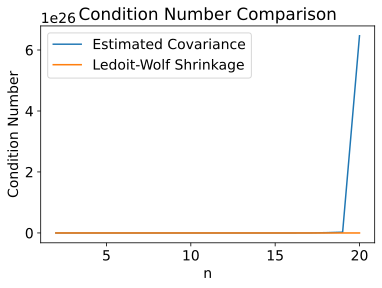

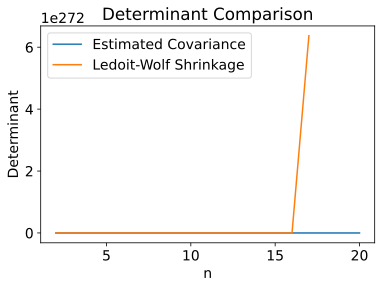

In [10]:
import numpy as np
from scipy.linalg import det
from sklearn.covariance import LedoitWolf
import matplotlib.pyplot as plt

def vandermonde_matrix(x, n):
    return np.vander(x, N=n, increasing=True)

def simulate_data(n, samples=1000):
    x = np.linspace(1, n, n)
    V = vandermonde_matrix(x, n)
    mean = np.zeros(n)
    data = np.random.multivariate_normal(mean, V, size=samples)
    return data

def estimate_covariance(data):
    return np.cov(data, rowvar=False)

def ledroit_wolf_shrinkage(data):
    lw = LedoitWolf()
    lw.fit(data)
    return lw.covariance_

n_values = range(2, 21)
condition_numbers = []
determinants = []
lw_condition_numbers = []
lw_determinants = []

for n in n_values:
    data = simulate_data(n)
    cov_matrix = estimate_covariance(data)
    lw_cov_matrix = ledroit_wolf_shrinkage(data)
    
    condition_numbers.append(np.linalg.cond(cov_matrix))
    determinants.append(det(cov_matrix))
    lw_condition_numbers.append(np.linalg.cond(lw_cov_matrix))
    lw_determinants.append(det(lw_cov_matrix))

plt.figure()
plt.plot(n_values, condition_numbers, label="Estimated Covariance")
plt.plot(n_values, lw_condition_numbers, label="Ledoit-Wolf Shrinkage")
plt.xlabel("n")
plt.ylabel("Condition Number")
plt.legend()
plt.title("Condition Number Comparison")

plt.figure()
plt.plot(n_values, determinants, label="Estimated Covariance")
plt.plot(n_values, lw_determinants, label="Ledoit-Wolf Shrinkage")
plt.xlabel("n")
plt.ylabel("Determinant")
plt.legend()
plt.title("Determinant Comparison")

plt.show()




Se generaron dos gráficos que mostarron cómo el shrinkage de Ledoit y Wolf afecta el número de condición y el determinante de la matriz de covarianza estimada en comparación con la estimación de la matriz de covarianza sin shrinkage.

En general, se puede observar que el shrinkage de Ledoit y Wolf mejora el número de condición (condition numbert) en comparación con la matriz de covarianza estimada sin shrinkage. Esto se puede ver en el gráfico de comparación del número de condición, donde el número de condición para la matriz de covarianza estimada utilizando el shrinkage de Ledoit y Wolf es menor que el de la matriz de covarianza estimada sin shrinkage.

**Esto indica que el shrinkage de Ledoit y Wolf puede ser útil para mejorar la estabilidad numérica y reducir el efecto de los problemas de mal condicionamiento en la matriz de covarianza estimada basada en la matriz de Vandermonde.**

## Resolviendo el punto 15 con Vandermonde

In [11]:
import numpy as np
from scipy.linalg import inv

def vandermonde_matrix(x, n):
    return np.vander(x, N=n, increasing=True)

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
V = vandermonde_matrix(x, 15)

b = np.dot(V, x)

# Resolución del sistema utilizando la inversa de V
V_inv = inv(V)
x_estimated_vander = np.dot(V_inv, b)

print("x_estimated_vander:", x_estimated_vander)

# Resolución del sistema utilizando NumPy
x_np_solution_vander = np.linalg.solve(V, b)
print("x_np_solution_vander:", x_np_solution_vander)

# Resolución del sistema utilizando la descomposición QR
Q, R = np.linalg.qr(V)
x_qr_solution_vander = np.linalg.solve(R, np.dot(Q.T, b))
print("x_qr_solution_vander:", x_qr_solution_vander)


x_estimated_vander: [-5.25710129e+09  1.18171030e+10 -9.55417680e+09  3.63263827e+09
 -7.07684104e+08  7.29106620e+07 -3.76615318e+06  7.65732889e+04
  2.62846823e+00  3.11799716e-01 -1.06611974e+00 -2.42394067e+00
  4.05991120e-01 -1.12480900e+00  2.94332482e-01]
x_np_solution_vander: [-5.25710129e+09  1.18171030e+10 -9.55417680e+09  3.63263827e+09
 -7.07684104e+08  7.29106620e+07 -3.76615318e+06  7.65732889e+04
  2.62846823e+00  3.11799716e-01 -1.06611974e+00 -2.42394067e+00
  4.05991120e-01 -1.12480900e+00  2.94332482e-01]
x_qr_solution_vander: [-5.25710129e+09  1.18171030e+10 -9.55417680e+09  3.63263827e+09
 -7.07684104e+08  7.29106620e+07 -3.76615318e+06  7.65732889e+04
  2.62846823e+00  3.11799716e-01 -1.06611974e+00 -2.42394067e+00
  4.05991120e-01 -1.12480900e+00  2.94332482e-01]


Generamos la matriz de Vandermonde utilizando la función vandermonde_matrix(), y luego realizamos
 operaciones similares a las del punto 15 con la matriz de Hilbert. También se utilizan las 
 soluciones alternativas basadas en np.linalg.solve() y descomposición QR.

En cuanto a las aplicaciones matemáticas útiles de la matriz de Hilbert 
y la matriz de Vandermonde en analítica de datos:

Matriz de Hilbert: La matriz de Hilbert se utiliza principalmente como un ejemplo de una matriz mal 
condicionada en la resolución de sistemas de ecuaciones lineales y en análisis numérico. Dado que 
la matriz de Hilbert es simétrica y positiva definida, también se puede utilizar en problemas 
de optimización y estimación de covarianzas.

Matriz de Vandermonde: La matriz de Vandermonde es útil en aplicaciones
 de interpolación polinomial y ajuste de curvas. También se utiliza en la transformada discreta de Fourier, la transformada rápida de Legendre y en la teoría de códigos correctores de errores.

**Para mejorar la estabilidad numérica y la precisión al tratar con estos problemas** 
**mal condicionados, se pueden utilizar diferentes técnicas, como:**

Utilizar la descomposición QR, entre otras, pero hasta ahora conocemos la descomposición QR.
**(Usamos la descomposición QR en este punto y en el anterior)**
Escalar y normalizar los datos antes de aplicar operaciones matemáticas.
Emplear métodos de regularización para prevenir el ajuste excesivo 
y reducir el impacto de la multicolinealidad en la solución.